<img src="https://webassets.unt.edu/assets/branding/unt-stacked-logo.svg" alt="UNT | University of North Texas" class="desktop-logo" width="300" height="500">

<div style="text-align: right"><strong>Young Yu</strong></div>
<div style="text-align: right"><strong>Date</strong></div>
<div style="text-align: right"><strong>Student Id</strong></div>
<div style="text-align: right"><strong>ADTA 5240</strong></div>

**References:** <br>
<br>
*Citations*
- [Regression Models with multiple target variables](https://towardsdatascience.com/regression-models-with-multiple-target-variables-8baa75aacd)
- 
*Images*
- [Data Science Life Cycle](https://medium.com/@skeredy/taking-the-first-step-understanding-the-6-stages-of-the-data-science-life-cycle-141ee6296ce2)
<!-- A lot of the data visual structuring was borrowed Mardiat-Iman, so these lines stay. Converting the visuals to functions are my own, but the structuring was inspired by Mardiat Iman's contributions on Github --> 
- [Project Inspiration: Github](https://github.com/jupyter-nass/awesome-notebooks)
- [Visualizations: Mardiat-Iman](https://www.linkedin.com/in/mardiat-iman-ibrahim-imam-726027262)


# **Risk Modeling**
**Background**<br>
<br>
<br>
**Business Proposal**   

* **The goal of problem** 

## About the Dataset

##### Target Variables
##### Predictors

### Data Dictionary
|      Column      |   DataType   | DataClass |                             Desc                              |
|:----------------:|:------------:|:---------:|:-------------------------------------------------------------:|
|   ***TagName***  | Categorical  | Nominal   | Variable name |
|     ***Date***   |   Date/Time  |   N/A     | Date when data was recorded |
|    ***Value***   |  Numerical   | Continuous| Value of the data point |
|   ***vValue***   |  Numerical   | Continuous|                         |
|   ***MinRaw***   |  Numerical   | Continuous| Minimum value for the tag |
|   ***MaxRaw***   |  Numerical   | Continuous| Maximum value for the tag |
|    ***MinEU***   |  Numerical   | Continuous| Minimum value for the engineering unit value |
|    ***MaxEU***   |  Numerical   | Continuous| Maximum value for the engineering unit value |
|     ***Unit***   | Categorical  | Nominal   | Unit of measurement |
|   ***Quality***  |  Numerical   | Continuous| Quality of the data during read |
|***QualityDetail***| Categorical | Ordinal   | Key value for a list of codes |
|***QualityString***| Categorical | Ordinal   | Description of QualityDetail |
|***StartDateTime***|  Date/Time  |   N/A     | Date and time of value was last updated |


## Methodology Section
<br>


## Model Section

##### K-Nearest Neighbor <br>

##### Decision Tree <br>

##### Support Vector Regression <br>

## Code Section

### About the Code

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# PCA

In [3]:
# Assign the data filename to a variable
file = 'data/Output_2023.csv'

In [4]:
def filetype(file):
    """
    This function is for loading small datasets. The file type must be a .csv
    or one of the listed Excel formats.

    Parameters:
    - file (str): The file path to the data.

    Example: 
    df = df.read_csv(file, data parse_date=['datetime'], index_col='datetime')
    """
    try:
        if file.endswith('.csv'):
            df = pd.read_csv(file, low_memory=False)
            return df  
        elif file.endswith(('.xls', '.xlsx', '.odf', '.ods', '.odt')):  
            df = pd.read_excel(file)
            return df  
        else:
            print(f'Error: The file {file} has an unsupported format.')
            return None  
    except Exception as e: 
        print(f'An error occurred: {e}')
        return None
    

df = filetype(file) 

In [5]:
# Copies the original dataframe into a copy leaving the original unaltered.
df_copy = df.copy()

In [6]:
object_columns = df_copy.select_dtypes(include=['object']).columns
df_transform = df_copy.drop(object_columns, axis=1) 
# msno.matrix(df_transform.sample(250))
# df_transform.info()

In [7]:
cols = [
    'Reporting Area', 'Responding Officer #1  Badge No', 'Responding Officer #2 Badge No',
        'Reporting Officer Badge No','X Coordinate', 'Y Cordinate'
        ]
df_transform.drop(cols, axis=1, inplace=True)
# msno.matrix(df_transform.sample(250))
df_transform.dropna()

,Watch,Year of Incident,Day1 of the Year,Reviewing Officer Badge No,Criminal Justice Information Service Code,severity,NIBRS Type,Zip Code,x,y
0,2,2023,97,6464,23990194,9,1,75225,32.874667,-96.771552
1,2,2023,118,130917,24110003,10,0,75206,32.863490,-96.768920
2,2,2023,118,106077,24110003,10,0,75229,32.908801,-96.870640
3,2,2023,41,106077,24110003,10,0,75231,32.873560,-96.766600
4,2,2023,20,117512,24110003,10,0,75230,32.880720,-96.772950
...,...,...,...,...,...,...,...,...,...,...
9730,2,2023,50,129123,50990041,12,0,75219,32.810440,-96.810500
9731,2,2023,50,129123,50990041,12,0,75219,32.810440,-96.810500
9732,3,2023,62,57074,48010020,12,0,75202,32.775240,-96.801680
9733,3,2023,93,11086,48010020,12,0,75228,32.843180,-96.665360


In [8]:
X = df_transform
n_components = 10

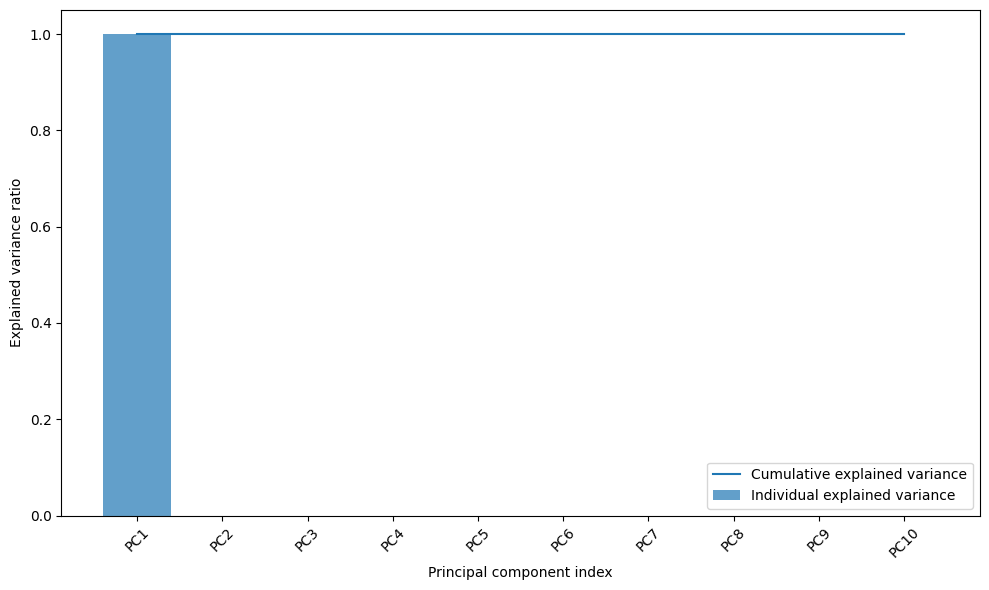

(               PC1           PC2        PC3        PC4       PC5       PC6  \
 0    -1.334954e+06  79594.115682  25.739864   1.550422 -0.024248 -0.013817   
 1    -1.215171e+06 -44883.943765  44.811974 -17.090911 -1.126533  0.130407   
 2    -1.215166e+06 -20043.944233  45.264104   5.823036 -1.119420  0.107089   
 3    -1.215166e+06 -20043.943066 -31.728468   8.085192 -1.282711  0.099512   
 4    -1.215168e+06 -31478.942502 -52.903773   7.196258 -1.337203  0.106275   
 ...            ...           ...        ...        ...       ...       ...   
 9730  2.566487e+07 -48712.744574 -21.373506  -3.734718 -0.289500  0.084681   
 9731  2.566487e+07 -48712.744574 -21.373506  -3.734718 -0.289500  0.084681   
 9732  2.268486e+07  23959.618330  -8.540197 -21.039150 -0.501817  1.041380   
 9733  2.268487e+07  69947.616940  23.240117   4.696139 -0.411136  1.004389   
 9734  2.271484e+07  23953.346221   6.461622 -21.090072 -0.466949  1.042697   
 
            PC7       PC8       PC9          PC10 

In [9]:
def pca(X, n_components=None):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    pca_result = pd.DataFrame(X_pca, columns=columns)
  
    pca_summary = pd.DataFrame({
        'Standard Deviation': np.sqrt(pca.explained_variance_),
        'Proportion of Variance': pca.explained_variance_ratio_,
        'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
    }).transpose()
    pca_summary.columns = columns  
    pca_summary = pca_summary.round(4) 
    
    plt.figure(figsize=(10, 6))
    plt.bar(columns, pca.explained_variance_ratio_, alpha=0.7, align='center',
            label='Individual explained variance')
    plt.step(columns, pca.explained_variance_ratio_.cumsum(), where='mid',
             label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.xticks(rotation=45)  
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    return pca_result, pca_summary, pca

pca(X, n_components=10)

# Geographical Plot w/ Filtering


In [10]:
# Assign the data filename to a variable
data = 'data/Output_2023.csv'

In [11]:
# recalling the previous function
df = filetype(data) 

In [12]:
df_copy = df.copy()

In [13]:
df = df_copy
x = 'x'
y = 'y'
categories = ['incident_type'] 
color_options = ["red", "blue"]

In [14]:
def geo_plot(df, x, y, categories, color_options):
    """
    Creates a Dash app with dynamic dropdowns for filtering a map visualization.
    
    Parameters:
    - df: DataFrame containing the data to be visualized.
    - x: String, the column name in df for x-axis values.
    - y: String, the column name in df for y-axis values.
    - categories: List of strings, the column names in df to create filters for. The first category listed will be the legend.
    - color_options: List of strings, colors for the plot.
    """
    
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df must be a pandas DataFrame")
    
    if not all(isinstance(item, str) for item in categories):
        raise ValueError("All categories must be string names of the dataframe columns")
    
    if not (isinstance(color_options, list) and len(color_options) >= 1):
        raise ValueError("color_options must be a list of color strings with at least one color")
    
    app = Dash(__name__)

    # Dynamic generation of dropdowns
    dropdowns = []
    for idx, category in enumerate(categories, start=0):
        unique_values = df[category].dropna().unique()
        options = [{'label': 'No Filter', 'value': 'No Filter'}] + \
                  [{'label': value, 'value': value} for value in unique_values]
        dropdown = dcc.Dropdown(
            id=f'category{idx}-dropdown',
            options=options,
            value='No Filter',  # Default value
        )
        dropdowns.append(dropdown)
    
    app.layout = html.Div(dropdowns + [dcc.Graph(id='data-map')])

    @app.callback(
        Output('data-map', 'figure'),
        [Input(f'category{idx}-dropdown', 'value') for idx, _ in enumerate(categories)]
    )
    def update_map(*selected_values):
        filtered_df = df
        for category, selected_value in zip(categories, selected_values):
            if selected_value != 'No Filter':
                filtered_df = filtered_df[filtered_df[category] == selected_value]
                
        if filtered_df.empty:
            raise ValueError("Filtered dataset is empty. Adjust filter selections.")
        
        # Use the first category for coloring
        color_category = categories[0]
        fig = px.scatter_mapbox(filtered_df, lat=x, lon=y,
                                color=color_category,
                                zoom=3, height=800)
        fig.update_layout(
            mapbox_style="white-bg",
            mapbox_center={"lon": -96.7970, "lat": 32.7767},
            mapbox_zoom=9.5,
            mapbox_layers=[{
                "below": 'traces',
                "sourcetype": "raster",
                "sourceattribution": "United States Geological Survey",
                "source": [
                    "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
                ]
            }],
            margin={"r":0,"t":0,"l":0,"b":0}
        )
        return fig

    return app

if __name__ == '__main__':
    app = geo_plot(df, 'x', 'y', categories, color_options)
    app.run_server(debug=True)

# KMEANS - Clustering

In [21]:
# Assign the data filename to a variable
file = 'data/Output_2023.csv'

In [22]:

df = filetype(file) 

In [23]:
df_copy = df.copy()


In [24]:
# Inputs
df = df_copy
features = ['severity']


In [25]:
# Input
df = df_transform
x_col = 'x'
y_col = 'y'
title = 'Clusters'
fig_path = f'visuals/{title}.png'
n_clusters_range = (1, 20)
n_init = 15
random_state = None

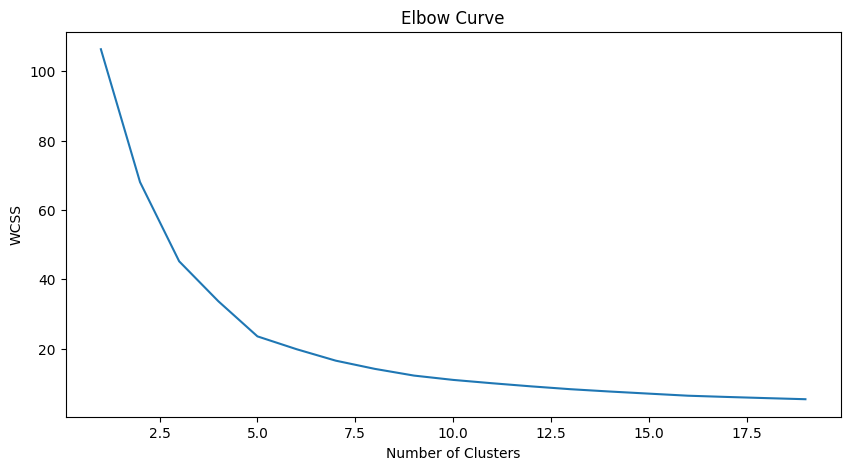

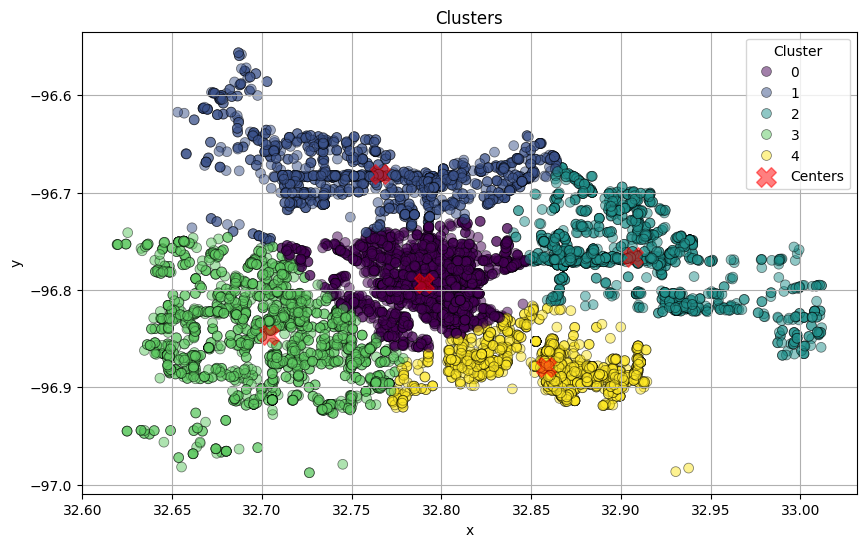

In [26]:
def kmeans_plot(df, x_col, y_col, title, fig_path, n_clusters_range=(1, 10), n_init=10, random_state=42):
    
    X = df[[x_col, y_col]]
    
    wcss = []
    for i in range(*n_clusters_range):
        kmeans = KMeans(n_clusters=i, n_init=n_init, random_state=random_state)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(*n_clusters_range), wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Curve')
    plt.show()
    
    try:
        num_clusters = int(input("Enter the number of clusters based on the elbow curve: "))
    except ValueError:
        print("Invalid number. Using the default 3 clusters.")
        num_clusters = 3
    
    kmeans = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=random_state)
    df['cluster_label'] = kmeans.fit_predict(X)

    centers = kmeans.cluster_centers_
    
    fig = plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='cluster_label', palette='viridis', s=50, alpha=0.5, edgecolor='black')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centers')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Cluster')
    plt.grid(True)
    
    fig.savefig(fig_path)
    plt.show()

kmeans_plot(df, x_col, y_col, title, fig_path, n_clusters_range, n_init, random_state)

# DBSCAN - Clustering

In [27]:
# Assign the data filename to a variable
file = 'data/Output_2023.csv'

In [28]:
df = filetype(file) 

In [29]:
df_copy = df.copy()

In [38]:
# Inputs
df = df_copy
features = ['severity', 'x', 'y']


In [39]:
def numeric_data(df, features):
    """
    This function drops categorical data for quick analysis of the 
    selected numerical data, then scales the data into a new data frame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - features (list): The selected numeric columns from a list.

    Returns:
    - A processed DataFrame with scaled numeric features.
    """
    # Drop columns with object data type
    object_columns = df.select_dtypes(include=['object']).columns
    df_clean = df.drop(object_columns, axis=1)
    
    # Drop rows with NaN values
    df_clean = df_clean.dropna()
    
    # Scale features
    scaler = StandardScaler()
    df_clean[features] = scaler.fit_transform(df_clean[features])
    
    return df_clean

df_transform = numeric_data(df_copy, features)

In [42]:
# Inputs

df = df_transform
x_col = 'x'
y_col = 'y'
eps = 0.2
min_samples = 6
title = 'DBSCAN'
fig_path = f'visuals/{title}.png'
point_size = 50
alpha = 0.3

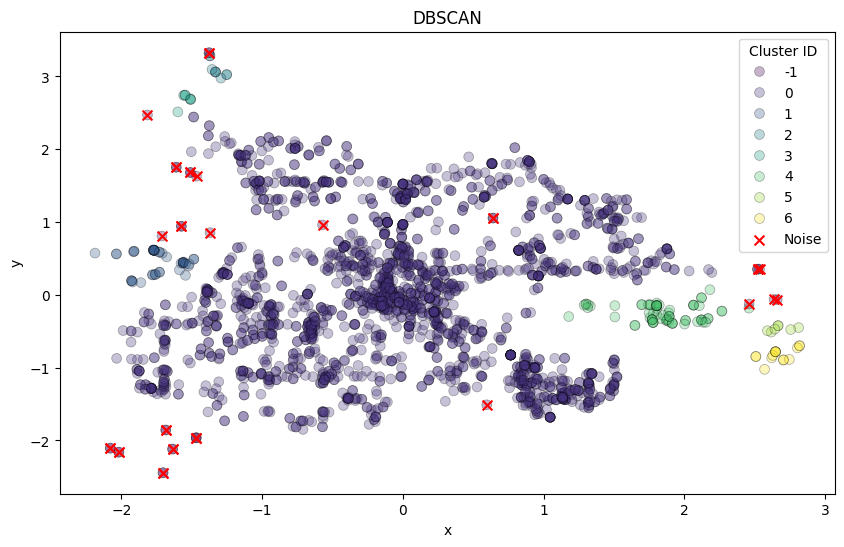

In [43]:
def dbscan(df, x_col, y_col, eps=0.01, min_samples=2, title='DBScan', fig_path=None, point_size=50, alpha=0.30):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df[[x_col, y_col]])
    df.loc[:,'cluster'] = clusters

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['cluster'], palette='viridis', edgecolor='k', s=point_size, alpha=alpha, legend='full')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    noise_points = df[df['cluster'] == -1]
    if not noise_points.empty:
        plt.scatter(noise_points[x_col], noise_points[y_col], color='red', marker='x', s=point_size, label='Noise')
    
    plt.legend(title='Cluster ID')
    
    if fig_path:
        plt.savefig(fig_path)
    
    plt.show()

dbscan(df, x_col, y_col, eps, min_samples, title, fig_path, point_size, alpha)

# KNN Classification & Regression

In [92]:
# Assign the data filename to a variable
file = 'data/Output_2023.csv'

In [93]:

df = filetype(file) 

In [94]:
df_copy = df.copy()

In [95]:
df_copy = pd.get_dummies(df, columns=['incident_type']) 
# df_copy.head(3)

In [96]:

# features = ['x', 'y', 'severity']
object_columns = df_copy.select_dtypes(include=['object']).columns
df_clean = df_copy.drop(object_columns, axis=1)
cols = ['Watch', 'Reporting Area', 'Year of Incident', 'Day1 of the Year', 'Responding Officer #1  Badge No',
        'Responding Officer #2 Badge No', 'Reporting Officer Badge No', 'Reviewing Officer Badge No',
        'Criminal Justice Information Service Code', 'NIBRS Type', 'X Coordinate', 'Y Cordinate', 'Zip Code']
df_clean.drop(columns=cols, inplace=True)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9735 entries, 0 to 9734
Data columns (total 30 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   severity                                                                      9735 non-null   int64  
 1   x                                                                             9735 non-null   float64
 2   y                                                                             9735 non-null   float64
 3   incident_type_ARSON                                                           9735 non-null   bool   
 4   incident_type_ASSAULT                                                         9735 non-null   bool   
 5   incident_type_Animal Cruelty                                                  9735 non-null   bool   
 6   incident_type_BURGLARY          

In [97]:
features = []
for cols in df_clean:
    features.append(cols)
print(features)

['severity', 'x', 'y', 'incident_type_ARSON', 'incident_type_ASSAULT', 'incident_type_Animal Cruelty', 'incident_type_BURGLARY', 'incident_type_CREDIT CARD OR DEBIT CARD ABUSE', 'incident_type_CRIM MISCHIEF', 'incident_type_Drug Related Charges', 'incident_type_Evading Arrest', 'incident_type_FAIL TO COMPLY SEX OFFENDERS DUTY', 'incident_type_FRAUD', 'incident_type_GRAFFITI', 'incident_type_HARASSMENT', 'incident_type_ILLEGAL DUMPING', 'incident_type_IMPERSONATION', 'incident_type_INTERFERE W/ CHILD CUSTODY', 'incident_type_KIDNAPPING', 'incident_type_MANSLAUGHTER', 'incident_type_MARIJUANA', 'incident_type_OBSTRUCTION OR RETALIATION', 'incident_type_Other', 'incident_type_ROBBERY', 'incident_type_TAMPERING', 'incident_type_TERRORISTIC THREAT IMPAIR PUBLIC SER/PUBLIC FEAR SBI/INFLU GOV', 'incident_type_THEFT', 'incident_type_TRAF VIO', 'incident_type_UNAUTHORIZED USE OF MOTOR VEH', 'incident_type_Weapons Related Charges']


In [98]:
df_transform = numeric_data(df_clean, features)

In [99]:

target = df_transform['severity']
df_transform.drop(['severity'], axis=1, inplace=True)
df_transform.head(3)


,x,y,incident_type_ARSON,incident_type_ASSAULT,incident_type_Animal Cruelty,incident_type_BURGLARY,incident_type_CREDIT CARD OR DEBIT CARD ABUSE,incident_type_CRIM MISCHIEF,incident_type_Drug Related Charges,incident_type_Evading Arrest,...,incident_type_MARIJUANA,incident_type_OBSTRUCTION OR RETALIATION,incident_type_Other,incident_type_ROBBERY,incident_type_TAMPERING,incident_type_TERRORISTIC THREAT IMPAIR PUBLIC SER/PUBLIC FEAR SBI/INFLU GOV,incident_type_THEFT,incident_type_TRAF VIO,incident_type_UNAUTHORIZED USE OF MOTOR VEH,incident_type_Weapons Related Charges
0,0.997434,0.350303,-0.044221,-0.229478,-0.024834,-0.331332,-0.086922,-0.161682,-0.249385,-0.168252,...,-0.076744,-0.040574,-0.033634,-0.240909,-0.033634,-0.017557,2.673283,-0.048664,-1.020865,-0.106904
1,0.853060,0.387766,-0.044221,-0.229478,-0.024834,-0.331332,-0.086922,-0.161682,-0.249385,-0.168252,...,-0.076744,-0.040574,-0.033634,-0.240909,-0.033634,-0.017557,-0.374072,-0.048664,0.979562,-0.106904
2,1.438344,-1.060084,-0.044221,-0.229478,-0.024834,-0.331332,-0.086922,-0.161682,-0.249385,-0.168252,...,-0.076744,-0.040574,-0.033634,-0.240909,-0.033634,-0.017557,-0.374072,-0.048664,0.979562,-0.106904


In [100]:
X = df_transform
y = target
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=0)                                            
max_k=30
problem_type='regression'

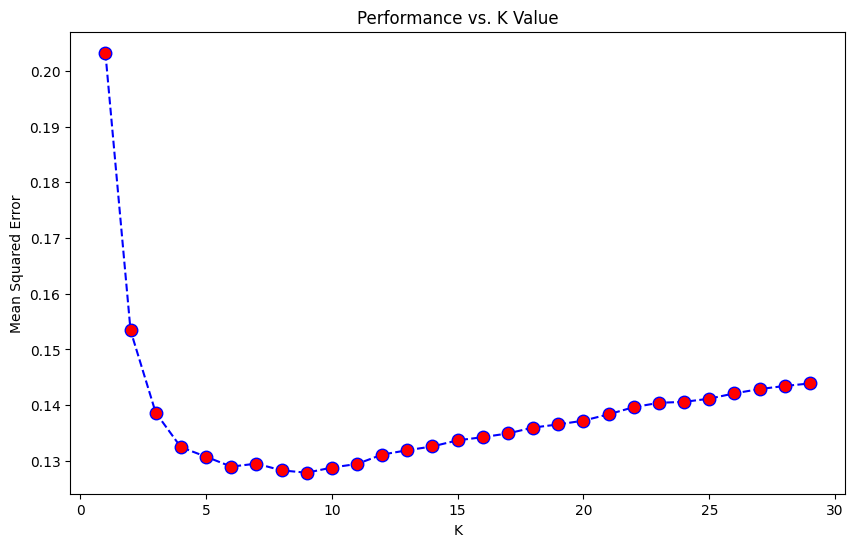

Best K Value: 9
Mean Squared Error (MSE): 0.12786210834712755
R^2 Score: 0.8753766886155495


In [101]:
def knn(X_train, y_train, X_test, y_test, max_k=40, problem_type='classification'):
    error_rate = []
    best_k = 1
    best_performance = np.inf if problem_type == 'regression' else -np.inf
    
    # model based on the problem type
    ModelClass = KNeighborsClassifier if problem_type == 'classification' else KNeighborsRegressor
    
    # Loop over a range of k values to find the one with the best performance
    for i in range(1, max_k):
        knn = ModelClass(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        
        if problem_type == 'classification':
            error = np.mean(pred_i != y_test)
        else:  # regression
            error = mean_squared_error(y_test, pred_i)
        
        error_rate.append(error)
        
        if (problem_type == 'classification' and error < best_performance) or (problem_type == 'regression' and error < best_performance):
            best_performance = error
            best_k = i
            
    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(range(1,max_k), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=9)
    plt.title('Performance vs. K Value')
    plt.xlabel('K')
    if problem_type == 'classification':
        plt.ylabel('Error Rate')
    else:
        plt.ylabel('Mean Squared Error')
    plt.show()
    
    # Retrain and evaluate with the best k value
    knn_best = ModelClass(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)
    pred_best = knn_best.predict(X_test)
    
    print(f"Best K Value: {best_k}")
    if problem_type == 'classification':
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, pred_best))
        print("\nClassification Report:")
        print(classification_report(y_test, pred_best))
    else:
        print("Mean Squared Error (MSE):", mean_squared_error(y_test, pred_best))
        print("R^2 Score:", r2_score(y_test, pred_best))

knn(X_train, y_train, X_test, y_test, max_k, problem_type)